In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.models import Sequential
%matplotlib inline

Using TensorFlow backend.


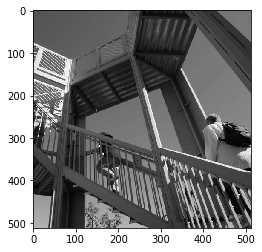

In [2]:
img = misc.ascent()
plt.imshow(img, cmap='gray')

In [3]:
img_tensor = img.reshape((1, 512, 512, 1))

### Because of the stride going vertically by 2 the vertical output will  be cut in 2 (after minusing 2 because no padding)

In [35]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))

# this doesnt matter, but we have to do it
model.compile('adam', 'mse')

In [36]:
img_pred_tensor = model.predict(img_tensor)

In [37]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [38]:
img_pred = img_pred_tensor[0, :, :, 0]
img_pred.shape

(255, 510)

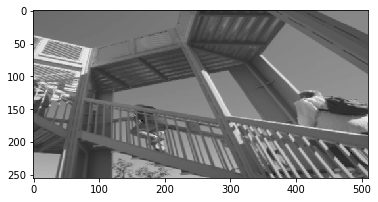

In [39]:
plt.imshow(img_pred, cmap='gray')

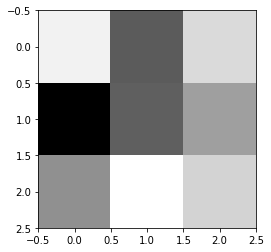

In [40]:
weights = model.get_weights()
weights[0].shape
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

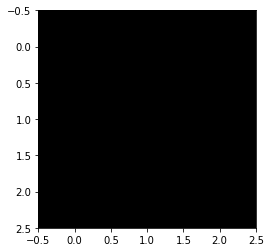

In [41]:
weights[0] = np.ones(weights[0].shape)
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [42]:
model.set_weights(weights)

In [43]:
img_pred_tensor = model.predict(img_tensor)

In [44]:
img_pred = img_pred_tensor[0, :, :, 0]

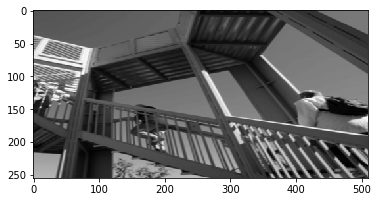

In [45]:
# slight blurr... why?... Filters are averaging pixels so a natural blur will occur... increase filter size and it will get more blurry
plt.imshow(img_pred, cmap='gray')

In [46]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

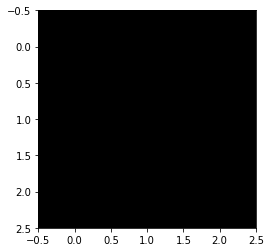

In [47]:
# re set weights
weights[0] = np.ones(weights[0].shape)
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')
model.set_weights(weights)
img_pred_tensor = model.predict(img_tensor)

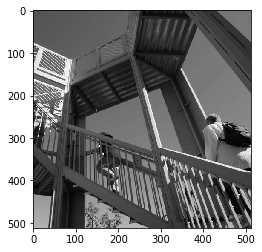

In [48]:
plt.imshow(img, cmap='gray')